In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

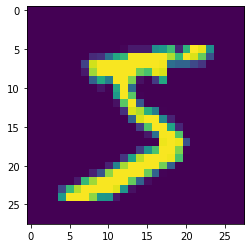

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train[0].shape

(28, 28)

In [6]:
#data preprocessing
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [10]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 170s 91ms/step - loss: 0.9276 - accuracy: 0.8743 - val_loss: 0.1078 - val_accuracy: 0.9681
Epoch 2/3
1875/1875 [==============================] - 168s 90ms/step - loss: 0.1141 - accuracy: 0.9662 - val_loss: 0.0734 - val_accuracy: 0.9778
Epoch 3/3
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0911 - accuracy: 0.9712 - val_loss: 0.0592 - val_accuracy: 0.9806


In [11]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[1.46198545e-07, 1.71877623e-08, 3.78514164e-06, 1.45664008e-05,
        5.00744406e-08, 5.60278934e-08, 2.22614385e-10, 9.99918103e-01,
        1.99357578e-06, 6.13292941e-05],
       [2.51377292e-04, 3.41579784e-04, 9.99106348e-01, 1.26487439e-05,
        1.95418238e-06, 4.06741776e-07, 1.68569852e-04, 3.24832200e-07,
        1.16849355e-04, 1.19792565e-09],
       [2.15839623e-06, 9.99194801e-01, 2.43285504e-05, 2.07668359e-06,
        4.47875471e-04, 3.61116217e-05, 6.51560504e-06, 4.97360415e-05,
        2.31027225e-04, 5.45559215e-06],
       [9.99257028e-01, 1.24744432e-07, 1.73073044e-04, 4.43148252e-07,
        1.10257106e-05, 6.37314297e-05, 7.57236630e-05, 2.05466495e-05,
        3.43697102e-05, 3.63863073e-04]], dtype=float32)

In [12]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)